In [1]:
import numpy as np
from processing_functions import * 

import os
os.chdir('../') # Go to the parent folder
from support_functions import *
from PCA_Functions import *
os.chdir('MNIST')

Using TensorFlow backend.


## Define Parameters

In [2]:
anomaly_digit = 2 # Set digit 2 as our anomaly
k = 20 # K to be used in Precision-k

## Read Datasets

### Load all saved datasets

In [3]:
data_path = 'data/input_data/'
# Read image matrix (n*m), labels (vector of m), and image size
imgs_train, imgs_test, labels_train, labels_test, height, width = read_process_data(data_path, anomaly_digit)

## PCA Method
### Apply PCA to Encode the images

In [4]:
# Define the number of Principal Components to keep from the image
n_components  = 200

Below is the eigenfaces from the PCA Matrix


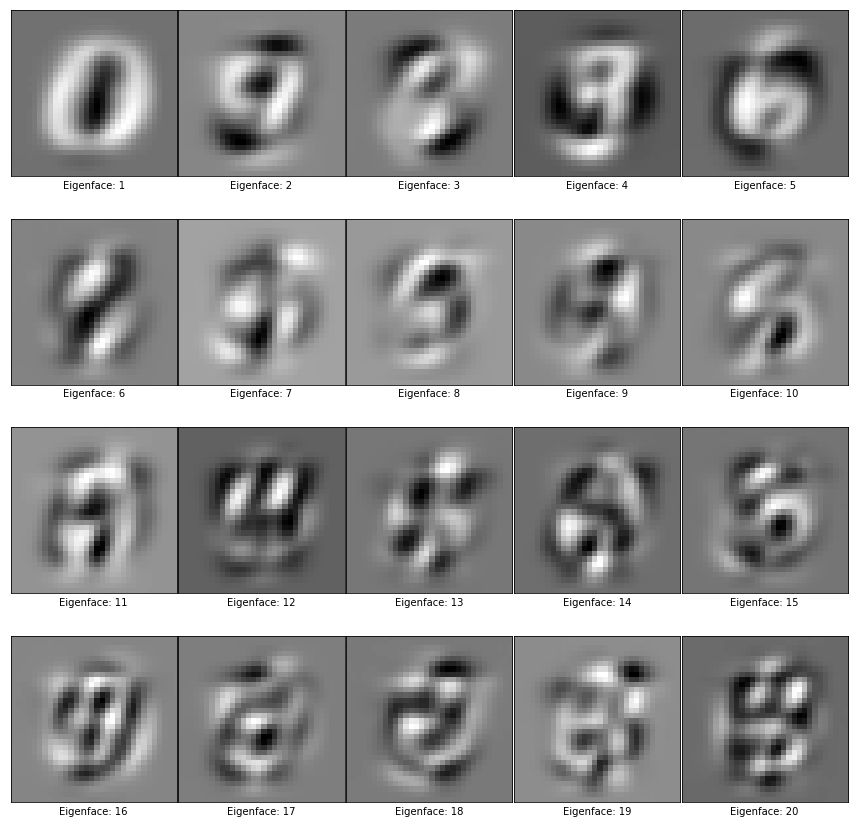

In [5]:
# Compute PCA with training dataset
imgs_train_encoded,pca_matrix, component_mean = pca_all_processes(imgs_train,labels_train,n_components, plot_eigenfaces_bool = True,decode = False, height=height,width=width)

# Encode the test set
imgs_test_encoded = encode_pca(imgs_test, component_mean,pca_matrix,n_components)

### Check if the Gaussian Covariance of the Encoded Matrix is Diagonal
"Just as a check, I *believe* the Gaussian covariance of the projected examples in the PCA case should be (nearly) diagonal... just pick a few dimensions and explicitly look at the covariance weights to verify this and show it in the next document iteration."

#### Get the Gaussian Covariance of the encoded matrix

In [41]:
def plot_heatmap_of_cov(data):
    """
    This function plots a heatmap of the covariance matrix of the input data
    Note: the data is of the size m*n, where m is the sample size and n is the number of dimensions
    """
    print('Description of the data: ')
    print('# Data Points: ' + str(data.shape[0]))
    print('# Dimensions: ' + str(data.shape[1]))
    data_cov = np.cov(data,rowvar=0) # Compute the covariance of each dimensions across rows
    plot_heatmap(data_cov)

def plot_heatmap_of_cov_by_segments(data):
    """
    This function aims to plots multiple heatmaps of the covariance of the input data by segments.
    It selects a few columns each time, compute the covariance, and plot the heatmap.
    Note: the data is of the size m*n, where m is the sample size and n is the number of dimensions
    """
    print('Description of the data: ')
    print('# Data Points: ' + str(data.shape[0]))
    print('# Dimensions: ' + str(data.shape[1]))
    n_dimensions = data.shape[1] # Number of dimensions = # columns
    for i in range(0, n_dimensions, 20):
        end = min(i+20,n_dimensions) # We cannot extract more dimensions than the total number
        data_cov_seg = np.cov(data[i:end,i:end],rowvar = 0)
        print('Heatmap Below: Dimensions ' + str(i) + ' to '+ str(end))
        plot_heatmap(data_cov_seg)
        
    
def plot_heatmap(data):
    """
    This function plots a heatmap with the input data matrix 
    """
    plt.imshow(data, cmap='jet', interpolation='nearest') # Create a heatmap
    plt.colorbar() # Add a Color Bar by the side
    plt.show()
    


Description of the data: 
# Data Points: 10000
# Dimensions: 200


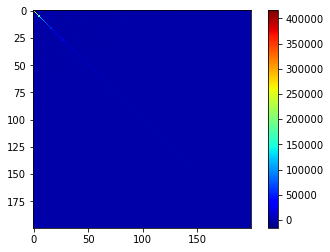

In [42]:
plot_heatmap_of_cov(imgs_test_encoded)

Description of the data: 
# Data Points: 10000
# Dimensions: 200
Heatmap Below: Dimensions 0 to 20


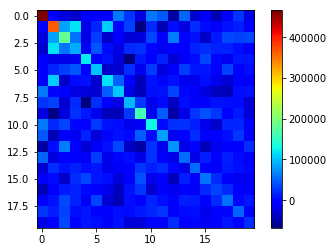

Heatmap Below: Dimensions 20 to 40


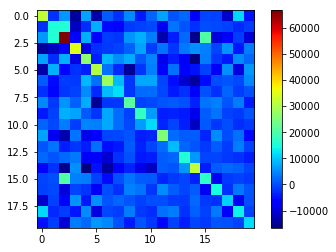

Heatmap Below: Dimensions 40 to 60


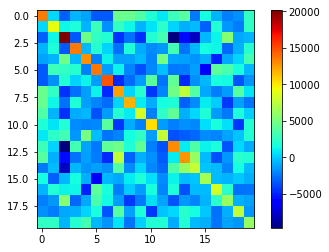

Heatmap Below: Dimensions 60 to 80


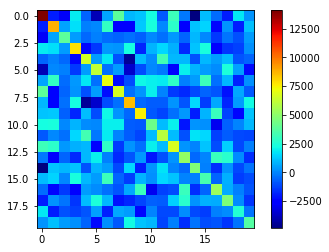

Heatmap Below: Dimensions 80 to 100


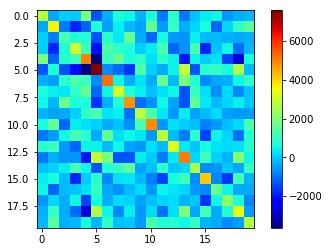

Heatmap Below: Dimensions 100 to 120


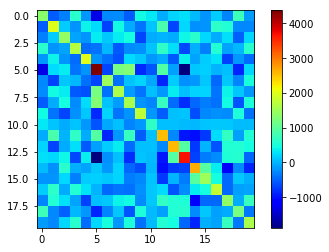

Heatmap Below: Dimensions 120 to 140


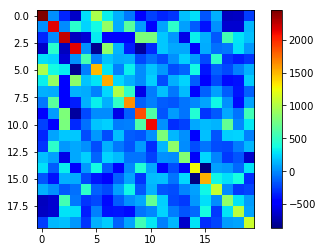

Heatmap Below: Dimensions 140 to 160


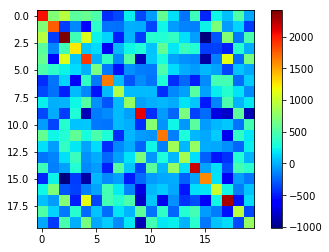

Heatmap Below: Dimensions 160 to 180


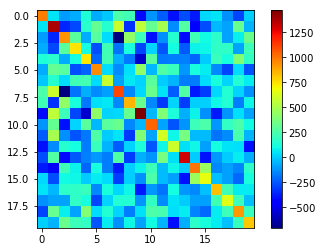

Heatmap Below: Dimensions 180 to 200


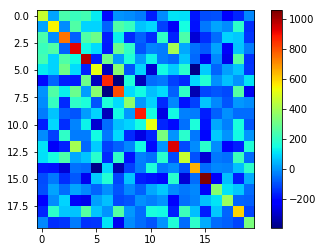

In [43]:
plot_heatmap_of_cov_by_segments(imgs_test_encoded)